In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as split

In [69]:
df = pd.read_csv('vehicles.csv')

#### Видалення аутлайнерів по цінам

In [70]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)
init_size = df.count()['id']
df = df.loc[filter]
filtered_size = df.count()['id']
print(init_size - filtered_size, '(', '{:.2f}'.format(100 * (init_size - filtered_size) / init_size), '%', ')',
      'outliers removed from dataset')

8177 ( 1.92 % ) outliers removed from dataset


#### Філтрація по року і ціні

In [71]:
df = df[df['price'] > 600]
df = df[df['year'] >= 1970]  # позбуваємось екзотичних авто, які можуть сильно вплинути на тренування моделей
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
27,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,...,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000,2021-05-04T12:31:18-0500
28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,...,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000,2021-05-04T12:31:08-0500
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,...,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000,2021-05-04T12:31:25-0500
30,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,...,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000,2021-05-04T10:41:31-0500
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,...,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,al,32.592000,-85.518900,2021-05-03T14:02:03-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [72]:
df = df[(df['price'] + df['odometer']) > 5000]
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
27,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,...,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000,2021-05-04T12:31:18-0500
28,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,...,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000,2021-05-04T12:31:08-0500
29,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,...,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000,2021-05-04T12:31:25-0500
30,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,...,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000,2021-05-04T10:41:31-0500
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,...,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,al,32.592000,-85.518900,2021-05-03T14:02:03-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


#### Видаляєм null значення з вагомих калонок

In [73]:
row_to_check = ['year', 'model', 'fuel', 'transmission', 'drive', 'type', 'paint_color']
for column in row_to_check:
    df = df[~df[column].isnull()]
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
31,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,...,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,NaN,al,32.592000,-85.518900,2021-05-03T14:02:03-0500
32,7316343444,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,...,NaN,pickup,black,https://images.craigslist.org/00V0V_ftJbKrOgdi...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000,2021-05-03T13:41:25-0500
33,7316304717,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,...,NaN,pickup,silver,https://images.craigslist.org/00E0E_iKN07Sh7ou...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000,2021-05-03T12:41:33-0500
34,7316285779,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,35000,2019.0,toyota,tacoma,excellent,6 cylinders,...,NaN,truck,grey,https://images.craigslist.org/00101_dXoZTH7iVm...,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,NaN,al,32.601300,-85.443974,2021-05-03T12:12:59-0500
35,7316257769,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,...,NaN,pickup,red,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,al,32.590000,-85.480000,2021-05-03T11:31:14-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426872,7301591201,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,32590,2020.0,mercedes-benz,c-class c 300,good,NaN,...,NaN,sedan,white,https://images.craigslist.org/00808_bYj0inoZ58...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:35-0600
426873,7301591202,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30990,2018.0,mercedes-benz,glc 300 sport,good,NaN,...,NaN,other,white,https://images.craigslist.org/00Q0Q_9VUbj91fKb...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:35-0600
426874,7301591199,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,...,NaN,sedan,white,https://images.craigslist.org/00I0I_hJHfjCUppa...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:34-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600


In [74]:
rm_brands = ['harley-davidson', 'alfa-romeo', 'datsun', 'tesla', 'land rover', 'porsche', 'aston-martin', 'ferrari']
for brand in rm_brands:
    df = df[~(df['manufacturer'] == brand)]

In [75]:
df = df.drop(  # ці ознаки ніяк не впливають на ціну, просто ссилки на зображення, id-шники, опис і тд
    ['VIN', 'posting_date', 'id', 'size', 'url', 'region', 'region_url', 'state', 'title_status', 'image_url', 'lat',
     'long',
     'description', 'county'], axis=1)

In [76]:
df = df.groupby('model').filter(lambda x: len(
    x) > 50)  # виробники з малою к-стю лотів не сильно інформативні для моделей, в силу малої вибірки авто
df['model'].value_counts()

f-150                    4056
silverado 1500           2609
1500                     1851
camry                    1563
silverado                1467
                         ... 
cts sedan 4d               51
rabbit                     51
corvette stingray z51      51
f-450                      51
gx 460                     51
Name: model, Length: 603, dtype: int64

In [77]:
df = df.replace(np.nan, 'null',
                regex=True)  # В деяких записах наявна більшість потрібних ознак, крім manufacturer, cylinders, condition, можна замінити на любу іншу назву по типу other
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,truck,black
32,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,other,4wd,pickup,black
33,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,other,4wd,pickup,silver
34,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,automatic,4wd,truck,grey
35,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,other,4wd,pickup,red
...,...,...,...,...,...,...,...,...,...,...,...,...
426863,25590,2017.0,null,Genesis G80 3.8 Sedan 4D,good,6 cylinders,gas,37608.0,automatic,rwd,sedan,white
426869,13990,2016.0,null,Scion iM Hatchback 4D,good,null,other,75626.0,other,fwd,hatchback,white
426870,22990,2020.0,hyundai,sonata se sedan 4d,good,null,gas,3066.0,other,fwd,sedan,blue
426874,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,automatic,rwd,sedan,white


In [78]:
df.dropna(axis=0, inplace=True)
df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,truck,black
32,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,other,4wd,pickup,black
33,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,other,4wd,pickup,silver
34,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,automatic,4wd,truck,grey
35,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,other,4wd,pickup,red
...,...,...,...,...,...,...,...,...,...,...,...,...
426863,25590,2017.0,null,Genesis G80 3.8 Sedan 4D,good,6 cylinders,gas,37608.0,automatic,rwd,sedan,white
426869,13990,2016.0,null,Scion iM Hatchback 4D,good,null,other,75626.0,other,fwd,hatchback,white
426870,22990,2020.0,hyundai,sonata se sedan 4d,good,null,gas,3066.0,other,fwd,sedan,blue
426874,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,automatic,rwd,sedan,white


In [79]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
type            0
paint_color     0
dtype: int64

In [ ]:
df.to_csv('preprocessed_v.csv')

In [2]:
# Щоб не ранити весь код зверху, можна загрузити препроцеснутий датасет
df = pd.read_csv('preprocessed_v.csv')
df = df.replace(np.nan, 'null', regex=True)
df = df.drop(columns='Unnamed: 0')

In [3]:
encoded_data = df[df.columns]
encoded_data = encoded_data.dropna()
encoded_data.shape

(122436, 12)

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scalers = [StandardScaler(), StandardScaler()]

encoded_data['year'] = scalers[0].fit_transform(encoded_data['year'].values.reshape(-1, 1))
encoded_data['odometer'] = scalers[1].fit_transform(encoded_data['odometer'].values.reshape(-1, 1))


encoded_data

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
0,15000,0.141352,ford,f-150 xlt,excellent,6 cylinders,gas,0.272400,automatic,rwd,truck,black
1,27990,-0.024487,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,-0.279794,other,4wd,pickup,black
2,34590,0.638869,chevrolet,silverado 1500 double,good,6 cylinders,gas,-0.644768,other,4wd,pickup,silver
3,35000,1.136385,toyota,tacoma,excellent,6 cylinders,gas,-0.519057,automatic,4wd,truck,grey
4,29990,0.638869,chevrolet,colorado extended cab,good,6 cylinders,gas,-0.758337,other,4wd,pickup,red
...,...,...,...,...,...,...,...,...,...,...,...,...
122431,25590,0.804708,null,Genesis G80 3.8 Sedan 4D,good,6 cylinders,gas,-0.569263,automatic,rwd,sedan,white
122432,13990,0.638869,null,Scion iM Hatchback 4D,good,null,other,-0.215267,other,fwd,hatchback,white
122433,22990,1.302224,hyundai,sonata se sedan 4d,good,null,gas,-0.890892,other,fwd,sedan,blue
122434,33590,0.970546,lexus,gs 350 sedan 4d,good,6 cylinders,gas,-0.632524,automatic,rwd,sedan,white


In [5]:
from sklearn.preprocessing import LabelEncoder
encoded_data =pd.get_dummies(encoded_data, dummy_na=True, columns = ['manufacturer', 'fuel','condition','drive','cylinders','transmission','type','paint_color'])
encoders = []

encoded_data['model'] = LabelEncoder().fit_transform(encoded_data['model'])

In [6]:
encoded_data

,price,year,model,odometer,manufacturer_acura,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,paint_color_nan
0,15000,0.141352,226,0.272400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,27990,-0.024487,469,-0.279794,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,34590,0.638869,476,-0.644768,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,35000,1.136385,521,-0.519057,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,29990,0.638869,122,-0.758337,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122431,25590,0.804708,44,-0.569263,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
122432,13990,0.638869,48,-0.215267,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
122433,22990,1.302224,497,-0.890892,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122434,33590,0.970546,309,-0.632524,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
df_for_1_model = encoded_data.copy()

In [51]:
X_train = encoded_data.drop(columns=['price'], axis=1)
y_train = encoded_data['price']
X_train, X_test, y_train, y_test = split(X_train, y_train, train_size=0.8, random_state=18)
y_test.shape

(24488,)

In [9]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Lambda, BatchNormalization

size = 97
def residual_block(x):
  y = Dense(size, activation='relu')(x)
  for i in range (0,3):
      y = Dense(size, activation='relu')(y)
  y = tf.keras.layers.Add()([x, y])
  return y

def self_attention(x):
  """A self-attention layer."""
  q = Dense(size, activation='tanh')(x)
  k = Dense(size, activation='tanh')(x)
  v = Dense(size, activation='tanh')(x)
  a = Lambda(lambda x: tf.matmul(x[0], x[1], transpose_b=True))(
      [q, k])
  a = tf.nn.softmax(a, axis=-1)
  y = Lambda(lambda x: tf.matmul(x[0], x[1]))([a, v])
  return y
inputs = tf.keras.layers.Input(shape=(size,))

# Residual blocks

x = residual_block(inputs)
x = BatchNormalization()(x)
x = residual_block(x)
x = BatchNormalization()(x)
x = self_attention(x)
x = BatchNormalization()(x)
x = residual_block(x)
x = BatchNormalization()(x)
x = residual_block(x)
x = BatchNormalization()(x)
x = self_attention(x)
x = BatchNormalization()(x)

# Dropout
x = Dropout(0.1)(x)

# Output layer
outputs = Dense(1)(x)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='rmsprop', loss='mse')

In [10]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')


In [11]:
from keras.utils.version_utils import callbacks
from matplotlib import pyplot as plt
checkpoint = callbacks.ModelCheckpoint(
        './tmp/checkpoint', save_format='tf', monitor='mse',verbose=0, save_best_only=True, save_weights_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint,early_stopping],
                    verbose=1)


Epoch 1/10
3061/3061 [==============================] - 16s 4ms/step - loss: 450122528.0000 - val_loss: 452978464.0000
Epoch 2/10
3061/3061 [==============================] - 11s 4ms/step - loss: 352954944.0000 - val_loss: 303549728.0000
Epoch 3/10
3061/3061 [==============================] - 10s 3ms/step - loss: 206314848.0000 - val_loss: 165872064.0000
Epoch 4/10
3061/3061 [==============================] - 11s 4ms/step - loss: 83113672.0000 - val_loss: 35528444.0000
Epoch 5/10
3061/3061 [==============================] - 11s 4ms/step - loss: 32229568.0000 - val_loss: 44852176.0000
Epoch 6/10
3061/3061 [==============================] - 11s 4ms/step - loss: 26786624.0000 - val_loss: 35534636.0000
Epoch 7/10
3061/3061 [==============================] - 11s 4ms/step - loss: 25501368.0000 - val_loss: 40027168.0000
Epoch 8/10
3061/3061 [==============================] - 10s 3ms/step - loss: 25219602.0000 - val_loss: 58310248.0000
Epoch 9/10
3061/3061 [==============================] - 10

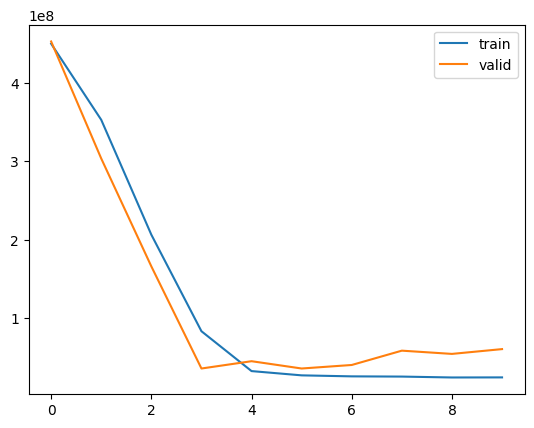

In [12]:
plt.figure(1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

model.save('resnet.h5')

In [13]:
y_pred = model.predict(X_test)

766/766 [==============================] - 1s 1ms/step


In [14]:
y_pred_train = model.predict(X_train)

3061/3061 [==============================] - 4s 1ms/step


In [15]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_pred_train)
print("R Squared value of test data: ",r2_train)

R Squared value of test data:  0.5924913116811347


In [16]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred)
print("R Squared value of test data: ",r2_test)

R Squared value of test data:  0.5818107864123601


In [17]:
y_test

21645      5000
6358       4000
25298     11988
64343     18933
112680    38590
          ...  
5424      10500
24365     20561
17301      2995
30378     11988
72145      2999
Name: price, Length: 24488, dtype: int64

In [18]:
y_pred

array([[16159.773],
       [15606.502],
       [16424.123],
       ...,
       [22920.537],
       [22920.535],
       [22920.537]], dtype=float32)

In [19]:
X_train.insert(0, 'pre_result', y_pred_train)
X_test.insert(0, 'pre_result', y_pred)

In [20]:
X_train.to_csv('train_with_pre.csv')

In [21]:
X_test.to_csv('test_with_pre.csv')

In [22]:
X_train

,pre_result,year,model,odometer,manufacturer_acura,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,paint_color_nan
21500,12441.706055,-1.185358,56,0.235155,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9777,23350.601562,1.468063,390,-0.878499,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32800,18809.992188,0.970546,498,-0.763114,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8101,13941.604492,-1.848714,459,0.398829,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2375,14629.379883,0.638869,389,-0.249030,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,27774.488281,0.307191,472,-0.189717,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
35653,33022.308594,0.804708,224,-0.563015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
91256,16556.214844,-0.024487,258,-0.226124,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
94483,19079.906250,-0.024487,479,0.296526,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X_train = pd.read_csv('train_with_pre.csv')
X_train = X_train.drop(columns='Unnamed: 0')
X_test = pd.read_csv('test_with_pre.csv')
X_test = X_test.drop(columns='Unnamed: 0')

In [24]:
X_train

,pre_result,year,model,odometer,manufacturer_acura,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,paint_color_nan
0,12441.7060,-1.185358,56,0.235155,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,23350.6020,1.468063,390,-0.878499,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,18809.9920,0.970546,498,-0.763114,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,13941.6045,-1.848714,459,0.398829,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,14629.3800,0.638869,389,-0.249030,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97943,27774.4880,0.307191,472,-0.189717,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
97944,33022.3100,0.804708,224,-0.563015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
97945,16556.2150,-0.024487,258,-0.226124,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
97946,19079.9060,-0.024487,479,0.296526,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
from keras.metrics import metrics

xgb_params = {
    'n_estimators':150,
    'learning_rate':0.1,
    'gamma':0,
    'subsample':0.8,
    'colsample_bytree':0.9,
    'max_depth':8
}

lgbm_params ={
    'feature_fraction':0.8,
    'bagging_fraction':0.8,
    'bagging_freq':2,
    'num_leaves':32
}
def MAPE_metric(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def MAE_metric(y_true, y_pred):
    return metrics.mean_absolute_error(y_true, y_pred)
def Accuracy_metric(y_true, y_pred):
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n
    alpha = pd.DataFrame(abs(y_true - y_pred)/y_true)
    Accuracy = (alpha[alpha <= 0.05].count() /alpha.count())*0.8+0.2*(1-mape)
    return np.float(Accuracy)

In [26]:
import xgboost as xgb


def train_xgb(x_train_f, y_train_f,x_test_f,y_test_f, params):
    mdl = xgb.XGBRegressor(**params)
    mdl.fit(x_train_f, y_train_f)
    y_pred_test = mdl.predict(x_test_f)
    y_pred_train_f = mdl.predict(x_train_f)
    x_train_f['pre_result'] = y_pred_train_f
    x_test_f['pre_result'] = y_pred_test
    return MAPE_metric(y_test_f, y_pred_test), Accuracy_metric(y_test_f, y_pred_test)

In [27]:
from lightgbm import LGBMRegressor


def train_lgbm(x_train_f, y_train_f,x_test_f,y_test_f, params):
    mdl = LGBMRegressor(**params)
    mdl.fit(x_train_f, y_train_f)
    y_pred_test = mdl.predict(x_test_f)
    y_pred_train = mdl.predict(x_train_f)

    x_train_f['pre_result'] = y_pred_train
    x_test_f['pre_result'] = y_pred_test
    return MAPE_metric(y_test_f, y_pred_test), Accuracy_metric(y_test_f, y_pred_test)

In [28]:
def vizualize(x,y):
    plt.plot(x,y)
    plt.show()

In [29]:

# global index
# index = 1
def use_XGB_LGBM_framework(x_train_f,y_train_f,x_test_f,y_test_f):
    min_loss = np.inf
    acc_res = []
    max_acc = 0
    loss = 1000000000000
    # while loss < min_loss:
    for index in range(1,30):
        print("loss= "+str(loss))
        print("min_loss= "+str(min_loss))
        min_loss = loss
        if index%2==1:
            loss, acc = train_xgb(x_train_f, y_train_f,x_test_f,y_test_f, xgb_params)
        else:
            loss,acc = train_lgbm(x_train_f, y_train_f,x_test_f, y_test_f, lgbm_params)
        acc_res.append(acc)
    enum = range(1, len(acc_res)+1)
    if acc > max_acc:
        max_acc = acc
    acc_res

    return enum,acc_res,max_acc

loss= 1000000000000
min_loss= inf


C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


loss= 19.411910036817368
min_loss= 1000000000000
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memo

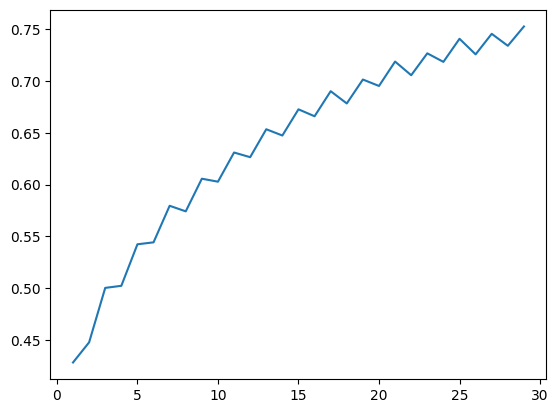

In [52]:
enum1,acc_res1,max_acc1 = use_XGB_LGBM_framework(X_train,y_train,X_test,y_test)
vizualize(enum1,acc_res1)

In [31]:
global single_results
single_results = pd.DataFrame(columns=['r2'])

global complex_results
complex_results = pd.DataFrame(columns=['r2'])


In [32]:
def train_model(concrete_model, x_train, y_train_f, x_test, y_test_f):
    concrete_model.fit(x_train, y_train_f)
    pred_train = concrete_model.predict(x_train)
    pred_test = concrete_model.predict(x_test)
    global single_results
    single_results = single_results.append(
        pd.DataFrame({'r2': [Accuracy_metric(y_test_f, pred_test)]}, index=[str(type(concrete_model).__name__)]))
    return pred_train, pred_test

def train_model_add_preds(concrete_model, x_train, y_train_f, x_test, y_test_f):
    pred_train, pred_test = train_model(concrete_model, x_train, y_train_f, x_test, y_test_f)
    x_train.insert(0, 'pre_result', pred_train)
    x_test.insert(0, 'pre_result', pred_test)


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
linear = LinearRegression()
rf = RandomForestRegressor()
xgb_1 = xgb.XGBRegressor(**xgb_params)
lgbm_1 = lgb.LGBMRegressor(**lgbm_params)

In [34]:
X_train_single = df_for_1_model.drop(columns=['price'], axis=1)
y_train_single = df_for_1_model['price']
X_train_single, X_test_single, y_train_single, y_test_single = split(X_train_single, y_train_single, train_size=0.8, random_state=18)


y_test_single.shape

(24488,)

In [35]:
models = [linear,rf,xgb_1,lgbm_1]
for m in models:
    train_model(m, X_train_single, y_train_single, X_test_single, y_test_single)

C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

In [43]:
single_results = single_results.append(pd.DataFrame({'r2': [r2_score(y_train, y_pred_train)]}, index=['ResNet']))

In [46]:
single_results

,r2
LinearRegression,0.199300
RandomForestRegressor,0.587182
XGBRegressor,0.411218
LGBMRegressor,0.337794
ResNet,0.592491


In [37]:
import joblib
joblib.dump(linear, "linear.joblib")
joblib.dump(rf, "rf.joblib")
joblib.dump(xgb_1, "xgb_1.joblib")
joblib.dump(lgbm_1, "lgbm_1.joblib")

['lgbm_1.joblib']

In [38]:
global complex_results
complex_results = pd.DataFrame(columns=['r2'])

In [39]:
accuracies = []
X_train_single = df_for_1_model.drop(columns=['price'], axis=1)
y_train_single = df_for_1_model['price']
X_train_single, X_test_single, y_train_single, y_test_single = split(X_train_single, y_train_single, train_size=0.8, random_state=18)
for m in models:
    train_model_add_preds(m,X_train_single, y_train_single, X_test_single, y_test_single)

    enum1,acc_res1,max_acc1 = use_XGB_LGBM_framework(X_train_single,y_train_single,X_test_single,y_test_single)
    accuracies.append(acc_res1)
    complex_results = complex_results.append(
        pd.DataFrame({'r2': [max_acc1]}, index=[str(type(m).__name__)]))
    X_train_single = df_for_1_model.drop(columns=['price'], axis=1)
    y_train_single = df_for_1_model['price']
    X_train_single, X_test_single, y_train_single, y_test_single = split(X_train_single, y_train_single, train_size=0.8, random_state=18)

C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


loss= 1000000000000
min_loss= inf
loss= 18.99442289673498
min_loss= 1000000000000
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001614 seconds.
You can set `force_row_wise=true` to

C:\Study\8_term\Comp_vision\L1\venv\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


loss= 1000000000000
min_loss= inf
loss= 4.022253388755889
min_loss= 1000000000000
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002454 seconds.
You can set `force_row_wise=true` to

In [47]:
single_results

,r2
LinearRegression,0.199300
RandomForestRegressor,0.587182
XGBRegressor,0.411218
LGBMRegressor,0.337794
ResNet,0.592491


In [55]:
complex_results = complex_results.append(
        pd.DataFrame({'r2': [max_acc1]}, index=['ResNet']))

In [56]:
complex_results

,r2
LinearRegression,0.791126
RandomForestRegressor,0.891778
XGBRegressor,0.806782
LGBMRegressor,0.798678
ResNet,0.752731


In [41]:
e = range(1,30)

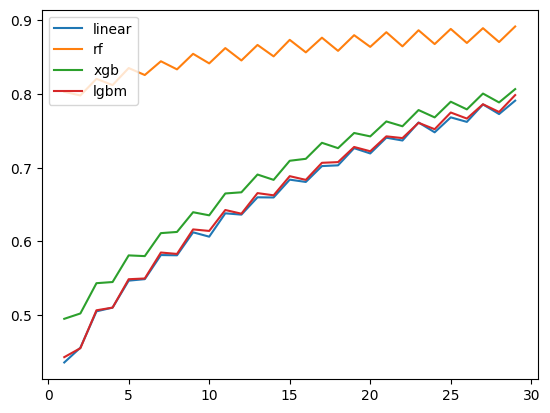

In [42]:
for m in accuracies:
    plt.plot(e,m)

plt.legend(['linear', 'rf','xgb','lgbm'], loc='upper left')
plt.show()